In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)

In [13]:
df

,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93
...,...
2015-04-22 20:32:53,51
2015-04-22 20:37:53,54
2015-04-22 20:42:53,46


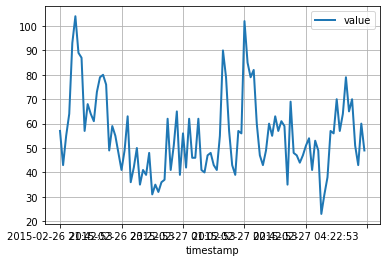

In [4]:
import matplotlib.pyplot as plt
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [5]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-22 19:57:53"]}],
    freq = "5min"
)

In [6]:
# [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}]

In [7]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/dataset/common.py:328: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/tr

In [8]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-22 20:53"]}],
    freq = "5min"
)

In [9]:
from gluonts.evaluation import make_evaluation_predictions

In [10]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

In [11]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [12]:
tss

[                        0
 2015-02-26 21:40:00  57.0
 2015-02-26 21:45:00  43.0
 2015-02-26 21:50:00  55.0
 2015-02-26 21:55:00  64.0
 2015-02-26 22:00:00  93.0
 ...                   ...
 2015-04-22 20:30:00  51.0
 2015-04-22 20:35:00  54.0
 2015-04-22 20:40:00  46.0
 2015-04-22 20:45:00  56.0
 2015-04-22 20:50:00  50.0
 
 [15831 rows x 1 columns]]

In [15]:
forecasts[0].median

array([58.09161 , 53.04648 , 51.963657, 55.579132, 53.355392, 53.35287 ,
       53.643276, 55.732735, 54.03286 , 54.998943, 58.364647, 58.24191 ],
      dtype=float32)

In [16]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

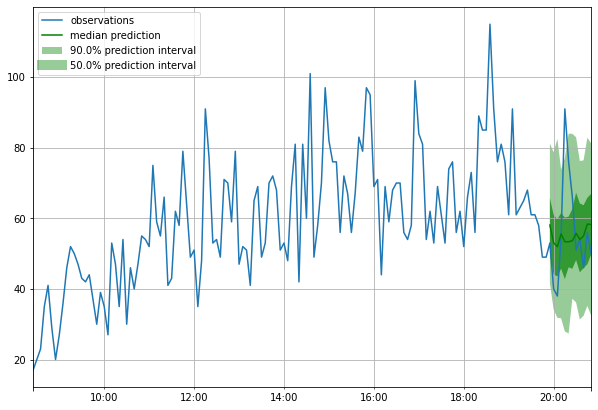

In [17]:
plot_prob_forecasts(tss[0], forecasts[0])

In [1]:
# let's try Labour data
import pandas as pd

In [2]:
train = pd.read_csv('input_data/new_data_samples/labour_0_actual.csv')
test = pd.read_csv('input_data/new_data_samples/labour_0_test.csv')

In [3]:
ets_fc = pd.read_csv('forecasts/new_data_samples/labour_0_arima_fitted.csv')

In [4]:
train.head()

,Level,Description,1987 Feb,1987 May,1987 Aug,1987 Nov,1988 Feb,1988 May,1988 Aug,1988 Nov,...,2001 Aug,2001 Nov,2002 Feb,2002 May,2002 Aug,2002 Nov,2003 Feb,2003 May,2003 Aug,2003 Nov
0,1,Aggregated,7022.252753,7103.523457,7092.257322,7182.161301,7247.304350,7354.833831,7353.286392,7508.606914,...,8971.895396,9055.644025,9092.309936,9134.673081,9150.286149,9286.740904,9372.599387,9380.077847,9326.951052,9427.739637
1,2,Clerical and Administrative Workers,930.407497,935.729428,929.215944,927.042911,979.207163,996.546683,973.677695,1007.354564,...,1204.706861,1191.077612,1215.771341,1182.746114,1182.631286,1216.355625,1231.079287,1231.353919,1227.069178,1220.071348
2,2,Community and Personal Service Workers,376.140947,391.941261,399.053387,404.995622,402.471254,425.435685,440.956679,444.381120,...,745.887085,749.455233,746.996815,757.790298,760.553157,788.013716,784.477191,789.056869,784.210871,791.884741
3,2,Labourers,972.114772,977.254094,957.642970,1001.464508,1001.333927,1008.966018,986.991276,1058.408477,...,1022.605673,1035.382456,1063.081986,1060.445507,1089.355715,1086.000550,1083.988427,1082.288986,1072.238274,1103.312016
4,2,Machinery Operators and Drivers,585.870954,589.297518,585.193260,609.630571,596.007942,607.278369,603.114123,607.822094,...,627.646758,616.339319,626.166078,622.342470,619.998223,632.596616,635.310670,632.656966,626.574176,613.239855


In [5]:
test.head()

,Level,Description,2004 Feb,2004 May,2004 Aug,2004 Nov,2005 Feb,2005 May,2005 Aug,2005 Nov,2006 Feb,2006 May,2006 Aug,2006 Nov
0,1,Aggregated,9434.453805,9533.473324,9462.086553,9652.922702,9744.614596,9850.755076,9870.335511,9944.998168,9961.137392,10082.055875,10105.773229,10201.645047
1,2,Clerical and Administrative Workers,1192.184511,1213.376251,1191.387073,1216.196535,1233.706695,1243.226546,1252.674435,1231.640982,1254.581798,1264.250994,1265.563147,1265.762731
2,2,Community and Personal Service Workers,802.000691,817.136130,814.224619,821.487528,815.433956,831.642371,855.623534,868.555840,821.175315,869.696504,857.535613,876.280521
3,2,Labourers,1073.601181,1093.042147,1101.394671,1104.844554,1119.507498,1107.821606,1076.236414,1110.368654,1094.413188,1102.467885,1148.408954,1133.178420
4,2,Machinery Operators and Drivers,625.907678,644.454333,637.188974,648.491097,635.805738,647.585419,635.541560,637.074605,638.479863,653.377200,661.011496,690.377599


In [6]:
ets_fc.head()

,Level,Description,1,2,3,4,5,6,7,8,...,59,60,61,62,63,64,65,66,67,68
0,1,Aggregated,7015.267854,7068.061050,7131.507955,7139.728499,7224.868300,7310.567830,7363.498518,7421.643696,...,9047.429092,8987.875012,9075.803582,9157.003027,9130.671417,9215.011660,9323.686565,9412.906542,9404.601861,9422.774349
1,2,Clerical and Administrative Workers,929.481244,934.669846,938.886148,932.778135,935.681373,984.494835,996.523688,978.369418,...,1207.827128,1187.975075,1195.579970,1204.862071,1184.812834,1195.576578,1226.117099,1233.830007,1235.445473,1238.551458
2,2,Community and Personal Service Workers,375.770968,383.290163,394.397009,402.990757,410.168178,412.413298,425.204073,439.381446,...,738.533038,748.436685,755.116928,757.147561,763.636597,768.229812,784.457577,790.629578,795.991429,796.159685
3,2,Labourers,971.142658,972.969346,973.429886,968.243752,990.136915,1003.517774,999.288317,1010.528595,...,1051.266367,1039.381065,1030.555020,1051.784467,1053.611419,1088.600294,1091.914278,1082.994078,1082.277305,1081.715606
4,2,Machinery Operators and Drivers,585.285083,585.870954,589.297518,585.193260,609.630571,596.007942,607.278369,603.114123,...,622.010104,627.646758,616.339319,626.166078,622.342470,619.998223,632.596616,635.310670,632.656966,626.574176


In [7]:
level = 2

In [8]:
level_ts = train.loc[train['Level'] == 2]

In [47]:
meta_data = level_ts['Description'].values

In [48]:
meta_data

array(['Clerical and Administrative Workers',
       'Community and Personal Service Workers', 'Labourers',
       'Machinery Operators and Drivers', 'Managers', 'Professionals',
       'Sales Workers', 'Technicians and Trades Workers'], dtype=object)

In [9]:
level_ts

,Level,Description,1987 Feb,1987 May,1987 Aug,1987 Nov,1988 Feb,1988 May,1988 Aug,1988 Nov,...,2001 Aug,2001 Nov,2002 Feb,2002 May,2002 Aug,2002 Nov,2003 Feb,2003 May,2003 Aug,2003 Nov
1,2,Clerical and Administrative Workers,930.407497,935.729428,929.215944,927.042911,979.207163,996.546683,973.677695,1007.354564,...,1204.706861,1191.077612,1215.771341,1182.746114,1182.631286,1216.355625,1231.079287,1231.353919,1227.069178,1220.071348
2,2,Community and Personal Service Workers,376.140947,391.941261,399.053387,404.995622,402.471254,425.435685,440.956679,444.381120,...,745.887085,749.455233,746.996815,757.790298,760.553157,788.013716,784.477191,789.056869,784.210871,791.884741
3,2,Labourers,972.114772,977.254094,957.642970,1001.464508,1001.333927,1008.966018,986.991276,1058.408477,...,1022.605673,1035.382456,1063.081986,1060.445507,1089.355715,1086.000550,1083.988427,1082.288986,1072.238274,1103.312016
4,2,Machinery Operators and Drivers,585.870954,589.297518,585.193260,609.630571,596.007942,607.278369,603.114123,607.822094,...,627.646758,616.339319,626.166078,622.342470,619.998223,632.596616,635.310670,632.656966,626.574176,613.239855
5,2,Managers,861.361824,883.782714,889.551718,886.888910,902.547810,918.494633,920.814713,933.251079,...,1100.610845,1168.277015,1154.339634,1133.101209,1089.929301,1099.964484,1119.169306,1135.767402,1120.349958,1152.300061
6,2,Professionals,1072.217031,1103.997587,1110.054513,1097.741754,1109.018259,1134.560947,1146.773974,1149.726478,...,1748.432423,1729.664937,1737.843833,1790.642114,1820.855636,1805.201294,1827.296436,1815.268716,1825.615031,1859.810615
7,2,Sales Workers,971.798705,968.778290,960.748316,1000.766905,984.220566,973.271430,970.394157,988.374973,...,1180.869972,1211.812152,1187.726767,1228.880764,1244.114392,1295.196360,1289.378886,1290.031396,1266.489803,1269.174045
8,2,Technicians and Trades Workers,1252.341023,1252.742565,1260.797215,1253.630120,1272.497429,1290.280066,1310.563774,1319.288129,...,1341.135780,1353.635301,1360.383482,1358.724605,1342.848439,1363.412259,1401.899185,1403.653593,1404.403761,1417.946957


In [10]:
level_ts_test = test.loc[test['Level'] == 2]

In [111]:
level_ts_test.columns[-1]

'2006 Nov'

In [22]:
test_all = pd.concat([level_ts, level_ts_test.iloc[:, 2:]], axis=1)


In [24]:
test_all

,Level,Description,1987 Feb,1987 May,1987 Aug,1987 Nov,1988 Feb,1988 May,1988 Aug,1988 Nov,...,2004 Aug,2004 Nov,2005 Feb,2005 May,2005 Aug,2005 Nov,2006 Feb,2006 May,2006 Aug,2006 Nov
1,2,Clerical and Administrative Workers,930.407497,935.729428,929.215944,927.042911,979.207163,996.546683,973.677695,1007.354564,...,1191.387073,1216.196535,1233.706695,1243.226546,1252.674435,1231.640982,1254.581798,1264.250994,1265.563147,1265.762731
2,2,Community and Personal Service Workers,376.140947,391.941261,399.053387,404.995622,402.471254,425.435685,440.956679,444.381120,...,814.224619,821.487528,815.433956,831.642371,855.623534,868.555840,821.175315,869.696504,857.535613,876.280521
3,2,Labourers,972.114772,977.254094,957.642970,1001.464508,1001.333927,1008.966018,986.991276,1058.408477,...,1101.394671,1104.844554,1119.507498,1107.821606,1076.236414,1110.368654,1094.413188,1102.467885,1148.408954,1133.178420
4,2,Machinery Operators and Drivers,585.870954,589.297518,585.193260,609.630571,596.007942,607.278369,603.114123,607.822094,...,637.188974,648.491097,635.805738,647.585419,635.541560,637.074605,638.479863,653.377200,661.011496,690.377599
5,2,Managers,861.361824,883.782714,889.551718,886.888910,902.547810,918.494633,920.814713,933.251079,...,1193.166763,1230.139917,1267.972420,1235.001108,1246.307821,1246.448990,1298.276006,1255.532723,1272.440123,1313.070747
6,2,Professionals,1072.217031,1103.997587,1110.054513,1097.741754,1109.018259,1134.560947,1146.773974,1149.726478,...,1880.819848,1886.466319,1865.220194,1959.936098,1985.054669,1979.213796,2027.537255,2074.143705,2034.649338,2045.451353
7,2,Sales Workers,971.798705,968.778290,960.748316,1000.766905,984.220566,973.271430,970.394157,988.374973,...,1237.797630,1287.922016,1314.850005,1332.175823,1333.011998,1368.454918,1325.272456,1329.961721,1330.969225,1313.944007
8,2,Technicians and Trades Workers,1252.341023,1252.742565,1260.797215,1253.630120,1272.497429,1290.280066,1310.563774,1319.288129,...,1406.106975,1457.374735,1492.118090,1493.366105,1485.885082,1503.240382,1501.401510,1532.625142,1535.195333,1563.579669


In [25]:
def add_ts(dataframe, ls):
    for idx, ts_ in dataframe.iterrows():
        df_ = pd.DataFrame(ts_).iloc[2:,].reset_index()
        df_.columns = ['timestamp', 'value']
        ls.append(df_)

In [26]:
all_ts = []
all_ts_test = []
add_ts(level_ts, all_ts)
add_ts(test_all, all_ts_test)

In [27]:
all_ts

[   timestamp        value
 0   1987 Feb   930.407497
 1   1987 May   935.729428
 2   1987 Aug   929.215944
 3   1987 Nov   927.042911
 4   1988 Feb   979.207163
 ..       ...          ...
 63  2002 Nov  1216.355625
 64  2003 Feb  1231.079287
 65  2003 May  1231.353919
 66  2003 Aug  1227.069178
 67  2003 Nov  1220.071348
 
 [68 rows x 2 columns],
    timestamp       value
 0   1987 Feb  376.140947
 1   1987 May  391.941261
 2   1987 Aug  399.053387
 3   1987 Nov  404.995622
 4   1988 Feb  402.471254
 ..       ...         ...
 63  2002 Nov  788.013716
 64  2003 Feb  784.477191
 65  2003 May  789.056869
 66  2003 Aug  784.210871
 67  2003 Nov  791.884741
 
 [68 rows x 2 columns],
    timestamp        value
 0   1987 Feb   972.114772
 1   1987 May   977.254094
 2   1987 Aug    957.64297
 3   1987 Nov  1001.464508
 4   1988 Feb  1001.333927
 ..       ...          ...
 63  2002 Nov   1086.00055
 64  2003 Feb  1083.988427
 65  2003 May  1082.288986
 66  2003 Aug  1072.238274
 67  2003 Nov  

In [28]:
all_ts_test

[   timestamp        value
 0   1987 Feb   930.407497
 1   1987 May   935.729428
 2   1987 Aug   929.215944
 3   1987 Nov   927.042911
 4   1988 Feb   979.207163
 ..       ...          ...
 75  2005 Nov  1231.640982
 76  2006 Feb  1254.581798
 77  2006 May  1264.250994
 78  2006 Aug  1265.563147
 79  2006 Nov  1265.762731
 
 [80 rows x 2 columns],
    timestamp       value
 0   1987 Feb  376.140947
 1   1987 May  391.941261
 2   1987 Aug  399.053387
 3   1987 Nov  404.995622
 4   1988 Feb  402.471254
 ..       ...         ...
 75  2005 Nov   868.55584
 76  2006 Feb  821.175315
 77  2006 May  869.696504
 78  2006 Aug  857.535613
 79  2006 Nov  876.280521
 
 [80 rows x 2 columns],
    timestamp        value
 0   1987 Feb   972.114772
 1   1987 May   977.254094
 2   1987 Aug    957.64297
 3   1987 Nov  1001.464508
 4   1988 Feb  1001.333927
 ..       ...          ...
 75  2005 Nov  1110.368654
 76  2006 Feb  1094.413188
 77  2006 May  1102.467885
 78  2006 Aug  1148.408954
 79  2006 Nov  

In [29]:
from gluonts.dataset.common import ListDataset

In [30]:
start = pd.Timestamp('1987 Feb')

In [31]:
# all_ts_test[0]
# start_test = pd.Timestamp('2004 Feb')

In [32]:
# create train, test samples

In [33]:
train_ds = []
test_ds = []
for timeseries in all_ts:
    train_ds.append({'target': timeseries['value'].values, 'start': start})

In [34]:
# test_ds

In [35]:
for timeseries in all_ts_test:
    test_ds.append({'target': timeseries['value'].values, 'start': start})

In [36]:
train_dataset = ListDataset(train_ds, freq='Q')

In [37]:
test_dataset = ListDataset(test_ds, freq='Q')

In [38]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

estimator = DeepAREstimator(freq="Q", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=train_dataset)

/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/dataset/common.py:338: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return timestamp.freq.rollforward(timestamp)
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/transform/feature.py:343: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base = start.freq.base
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/transfor

In [39]:
from gluonts.evaluation import make_evaluation_predictions
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_dataset,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

In [40]:
forecasts = list(forecast_it)
tss = list(ts_it)

In [58]:
fc_data = []
for i in range(0, len(forecasts)):
    fc_values = forecasts[i].median.tolist()
    fc_values.insert(0, meta_data[i])
    fc_data.append(fc_values)

In [59]:
pd.DataFrame(fc_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Clerical and Administrative Workers,1223.003662,1222.471436,1230.497314,1226.659302,1219.733887,1221.612915,1224.937500,1235.763306,1230.153442,1230.066528,1234.674683,1240.442749
1,Community and Personal Service Workers,792.351990,789.742004,796.351257,801.870605,794.855591,801.983215,801.466064,814.190430,801.425659,803.623840,805.262085,815.135437
2,Labourers,1086.731934,1086.777710,1085.054443,1091.796631,1089.621094,1088.284424,1097.363403,1095.650146,1088.170410,1102.432495,1096.192627,1108.630859
3,Machinery Operators and Drivers,631.003906,638.425293,640.231750,644.372192,640.116272,638.500916,647.346436,654.288391,653.811462,655.009949,661.393555,668.052368
4,Managers,1128.328735,1133.719971,1143.796265,1138.810669,1147.158569,1143.303467,1143.923706,1150.734619,1148.590088,1155.863525,1154.287231,1157.610596
5,Professionals,1817.712158,1816.450073,1817.278076,1827.076660,1815.072510,1816.454224,1809.597534,1804.700195,1789.243652,1802.197144,1804.674194,1800.822021
6,Sales Workers,1267.907837,1276.460327,1283.892090,1274.844971,1268.675171,1269.245605,1271.710938,1285.035156,1272.957642,1270.343872,1274.791626,1280.563965
7,Technicians and Trades Workers,1385.412231,1380.552734,1392.224854,1397.715942,1390.271240,1393.218262,1386.312500,1392.313599,1385.292480,1392.525635,1394.439941,1398.304810


In [63]:
# get fitted values
horizon = 12

In [61]:
# for fitted values I need to iterate over different samples
ts_length = len(all_ts[0])

In [76]:
def predict_sample(ts_array, start, predictor):
    train_sample = []
    for timeseries in ts_array:
        train_sample.append({'target': timeseries['value'].values, 'start': start})
    train_dataset = ListDataset(train_sample, freq='Q')
    forecast_it, ts_it = make_evaluation_predictions(
    dataset=train_dataset,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
    )
    return list(forecast_it)

In [101]:
all_samples = []

sample_count = 0
for sample_len in range(ts_length, 0, -12):
    all_samples.append([])
    for ts in all_ts:
        all_samples[sample_count].append(ts[0: sample_len])
    sample_count +=1

In [118]:
all_samples[1]

[   timestamp        value
 0   1987 Feb   930.407497
 1   1987 May   935.729428
 2   1987 Aug   929.215944
 3   1987 Nov   927.042911
 4   1988 Feb   979.207163
 5   1988 May   996.546683
 6   1988 Aug   973.677695
 7   1988 Nov  1007.354564
 8   1989 Feb  1024.048897
 9   1989 May  1034.782484
 10  1989 Aug  1022.835307
 11  1989 Nov  1044.951341
 12  1990 Feb   1051.18403
 13  1990 May  1051.019918
 14  1990 Aug  1022.274274
 15  1990 Nov  1022.899562
 16  1991 Feb  1048.475823
 17  1991 May  1037.936554
 18  1991 Aug  1026.126896
 19  1991 Nov   992.526267
 20  1992 Feb  1000.420368
 21  1992 May  1004.538033
 22  1992 Aug  1013.872737
 23  1992 Nov   981.831703
 24  1993 Feb  1014.269346
 25  1993 May  1029.034695
 26  1993 Aug  1018.747664
 27  1993 Nov  1040.556168
 28  1994 Feb  1055.594715
 29  1994 May  1067.900217
 30  1994 Aug  1063.267141
 31  1994 Nov  1065.542613
 32  1995 Feb  1083.435508
 33  1995 May   1076.76701
 34  1995 Aug  1103.032558
 35  1995 Nov  1086.272186
 

In [103]:
fitted_data = []

for ts in range(len(all_ts)):
    fitted_data.append([])

In [104]:
for sample in range(len(all_samples)-1, -1, -1):
    if len(all_samples[sample][0]) > horizon:
        all_sample_fc = predict_sample(all_samples[sample], start, predictor)
        for i in range(len(all_sample_fc)):
            fc_values = all_sample_fc[i].median.tolist()
            fitted_data[i].extend(fc_values)

/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/transform/feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base is None or self._freq_base == start.freq.base
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/Users/pereramg/pythonenv/hts-ml-env/lib/python3.8/site-packages/gluonts/transform/feature.py:384: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  ..., i0 : i0 + length * start.freq.n : start.freq.n


In [105]:
pd.DataFrame(fitted_data)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,994.602539,1005.157104,1002.585693,1019.629395,1016.144714,1009.326111,987.665771,989.648010,972.403870,965.246338,...,1187.746216,1197.899902,1185.173218,1179.067627,1187.281860,1182.651855,1171.652466,1179.601074,1180.759521,1180.421997
1,430.585541,438.858551,438.656128,449.718689,445.158112,449.590393,442.755096,443.814606,438.300903,433.160767,...,712.460388,716.215637,710.526489,710.736877,716.828003,719.948364,722.987061,725.373413,731.373169,730.831482
2,1029.757690,1042.394897,1037.219971,1053.093628,1050.481445,1039.646484,1023.123840,1025.076538,1010.622620,1001.539795,...,1064.766846,1078.139282,1067.946411,1073.434814,1064.799438,1076.878540,1068.349731,1075.579834,1073.686279,1081.769775
3,612.945435,626.252686,619.510559,631.767822,625.635559,630.659180,623.478821,621.413086,608.888062,610.720581,...,632.319275,628.351868,627.562439,628.107361,630.731995,642.477356,638.326355,634.444702,641.786316,649.787048
4,933.559448,944.341187,942.119202,954.291260,948.445007,945.728333,925.417664,920.306458,914.449890,904.852417,...,1025.637939,1038.351807,1030.904297,1031.427124,1039.247559,1037.252197,1027.786255,1034.229980,1040.345337,1043.618042
5,1149.243896,1162.278076,1152.169678,1177.807373,1170.085815,1161.098633,1136.487793,1134.949219,1108.962769,1113.153564,...,1638.955444,1641.750244,1629.663818,1628.362915,1629.718994,1629.178223,1613.429688,1620.184692,1606.317383,1621.684692
6,1006.158630,1017.677795,1005.181030,1022.663757,1016.332214,1015.692932,990.157471,981.652649,975.831787,971.754211,...,1193.820557,1206.392456,1190.468262,1192.867798,1195.148682,1204.589600,1194.761841,1194.935181,1201.113403,1211.459595
7,1324.244141,1329.905151,1315.248169,1336.989014,1335.829224,1321.468628,1299.017334,1287.444214,1274.016724,1261.177002,...,1349.131714,1367.116577,1348.694336,1345.946899,1352.197632,1346.951294,1346.812134,1343.161255,1345.858765,1353.915161


In [112]:
pd.DataFrame(fitted_data).append()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,994.602539,1005.157104,1002.585693,1019.629395,1016.144714,1009.326111,987.665771,989.648010,972.403870,965.246338,...,1187.746216,1197.899902,1185.173218,1179.067627,1187.281860,1182.651855,1171.652466,1179.601074,1180.759521,1180.421997
1,430.585541,438.858551,438.656128,449.718689,445.158112,449.590393,442.755096,443.814606,438.300903,433.160767,...,712.460388,716.215637,710.526489,710.736877,716.828003,719.948364,722.987061,725.373413,731.373169,730.831482
2,1029.757690,1042.394897,1037.219971,1053.093628,1050.481445,1039.646484,1023.123840,1025.076538,1010.622620,1001.539795,...,1064.766846,1078.139282,1067.946411,1073.434814,1064.799438,1076.878540,1068.349731,1075.579834,1073.686279,1081.769775
3,612.945435,626.252686,619.510559,631.767822,625.635559,630.659180,623.478821,621.413086,608.888062,610.720581,...,632.319275,628.351868,627.562439,628.107361,630.731995,642.477356,638.326355,634.444702,641.786316,649.787048
4,933.559448,944.341187,942.119202,954.291260,948.445007,945.728333,925.417664,920.306458,914.449890,904.852417,...,1025.637939,1038.351807,1030.904297,1031.427124,1039.247559,1037.252197,1027.786255,1034.229980,1040.345337,1043.618042
5,1149.243896,1162.278076,1152.169678,1177.807373,1170.085815,1161.098633,1136.487793,1134.949219,1108.962769,1113.153564,...,1638.955444,1641.750244,1629.663818,1628.362915,1629.718994,1629.178223,1613.429688,1620.184692,1606.317383,1621.684692
6,1006.158630,1017.677795,1005.181030,1022.663757,1016.332214,1015.692932,990.157471,981.652649,975.831787,971.754211,...,1193.820557,1206.392456,1190.468262,1192.867798,1195.148682,1204.589600,1194.761841,1194.935181,1201.113403,1211.459595
7,1324.244141,1329.905151,1315.248169,1336.989014,1335.829224,1321.468628,1299.017334,1287.444214,1274.016724,1261.177002,...,1349.131714,1367.116577,1348.694336,1345.946899,1352.197632,1346.951294,1346.812134,1343.161255,1345.858765,1353.915161


In [116]:
# pd.Timestamp('2005')